##### Version 0.01 Travanj 2017

# Izvor & ponor

## Kratki uvod

Teoretska osnove na kojoj počiva klasična aerodinamika je teorija potencijalnog toka.

Moramo imati na umu nekoliko pretpostavki: 

* tok je stacionaran;
* brzine su manje od lokalne brzine zvuka (inkompresibilni tok;
* fluid je idealan - nema viskoziteta;
* fluid je bezvrtložan (čestice fluida ne rotiraju). 

Izgleda puno, ali viskozni efekti dolaze do izražaja u tankom graničnom sloju (i za to postoji prilično korektna teorija unutar potencijalnog toka, mnoge primjene su efektivno bezvrtložne i podzvučne.

Potencijalni tok je *linearan*, što znači da se može primijeniti princip superpozicije.

Ovdje ćemo konstruirati dva osnovna rješenja potencijalnog toka: **izvor** i **ponor**. Konstruirat ćemo i njihov "zbroj", **source-sink pair**.

## Početak

Želimo numerički prikazati/izračunati struno polje izvora (**source**) i ponora (**sink**), odnosno dvije vrste potencijalnog toka.

U prvom redu je potrebno napraviti import par Python paketa:

* NumPy  - Nd liste, matrice itd.
* Matplotlib - 2D plot.
* `math`  - module s matematičkim funkcijama kako su definirane u C standard.


In [8]:
import math
import numpy
from matplotlib import pyplot

Potrebno je vizualitirati strujnice koje odgovaraju izvoru i ponoru. Prvo moramo definirati točke u domeni u kojima će brzine biti evaluirane.

Definirajmo uniformni set točaka u domeni koja je dugačka 4 u $x$ smjeru and 2 u $y$ smjeru, tj. $x,y\in\left[-2,2\right],\left[-1,1\right]$.

Varijabla `N` će biti broj točaka u svakom smjeru te ćemo definirati rubove domene s varijablama `x_start`, `x_end`, `y_start` i `y_end`. 

Koristimo NumPy funkciju [`linspace()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) kojim ćemo kreirati dva 1D polja koja sadrže vrijednosti $x$ and $y$ koordinata, što će odgovarati koordinatama naših prostornih točaka. Zadnja linija sadrži poziv na [`meshgrid()`](http://docs.scipy.org/doc/numpy-1.4.x/reference/generated/numpy.meshgrid.html) funkciju koja generira liste koje sadrže koordinate točaka gdje ćemo računati naše numeričko rješenje. 

In [9]:
N = 50                                   # number of points in each direction
x_start, x_end = -2.0, 2.0               # boundaries in the x-direction
y_start, y_end = -1.0, 1.0               # boundaries in the y-direction
x = numpy.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = numpy.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

print('x = ', x)
print('y = ', y)

X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

x =  [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y =  [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.

Nakon što smo generirali numeričku mrežu, prikazat ćemo je s modulom `pyplot` iz `matplotlib` knjižnice(ok, modula) pomoću funkcije  [`scatter()`](http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter).

Malo smo uredili *plot*: postavili label na $x$ i $y$ osi, odredili veličinu slike, postavili granice plota i [boju](http://matplotlib.org/api/colors_api.html?highlight=color#module-matplotlib.colors) točaka(*markers*).

IPython(jupyter) notebook mora prvo pozvati naredbu `%matplotlib inline`, čime se slike prikazuju unutar notebook-a kao statične PNG slike:

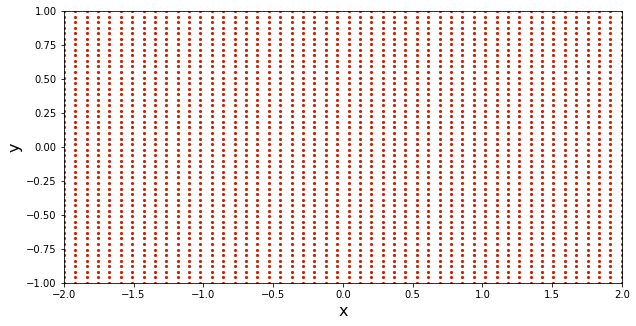

In [10]:
%matplotlib inline

# plot the grid of points
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=10, color='#CD2305', marker='o', linewidth=0)

Tek sad smo spremni izračunati vektore brzina na točkama domene koje koji odgovaraju izvoru. Tek onda možemo nacrtati strujnice.

## Source flow

Jednadžbe potencijalnog toka su *linearne*, čime je moguće rješenja kreirati superpozicijom. Odnosno, kompleksna strujanja su samo *zbroj* jednostavnih strujanja, kao što su izvor i ponor.

*Izvor* je točka iz koje fluid uniformno *izvire*. Odnosno, sve strujnice *izlaze* iz jedne točke kao ravne linije te se radijalna brzina smanjuje s udaljenošću od izvora. Svi primjeri će biti 2D. Pogodno je koristiti cilindrični koordinatni sustav $\left(r,\theta\right)$ zbog radijalne simetrije izvora. Kut $\theta$ je definiran $\tan^{-1}(y/x)$. Komponente brzine (radijalna i tangencijalna) su definirane kao:

$$u_r\left(r,\theta\right) = \frac{\sigma}{2\pi r} \text{,} \qquad u_\theta\left(r,\theta\right)=0$$

gdje je $\sigma$ *snaga*, ili *intenzitet* izvora. Tangencijala brzina je nula, jer zahtijevamo od strujnica da budu (izlaze iz izvora) kao ravne linije. Radijalna komponenta brzine je malo kompliciranija. Potrebno je primijeniti uvjet bezvrtložnos strujanja $\omega=0$ u cilindričnim koordinatama, čime se dobije $\mathbf{v}(r)$, odnosno brzina je funkcija od $r$. Tek onda je potrebno upotrijebiti jednadžbu kontinuiteta da bi se dobio rezultat.

Podsjetnik: *stream function*. Sada radimo u cilindričnim koordinatama: $\psi$ se dobije iz:

$$\frac{1}{r}\frac{\partial\psi}{\partial\theta} = u_r \quad \text{,} \quad -\frac{\partial\psi}{\partial r} = u_\theta$$

čime se nakon itegracije dobije

$$\psi = \frac{\sigma}{2\pi}\theta + \text{const.}$$

Obično se komponente brzine dobiju deriviranjem *stream* funkcije te se konstanta može zanemariti.

Polje brzina $\left(u,v\right)$ u kratezijevim koordinatama u točki $\left(x,y\right)$ koje odgovara izvoru intenziteta $\sigma$ smještenom u točki $\left(x_\text{source},y_\text{source}\right)$:

$$u = \frac{\partial\psi}{\partial y} = \frac{\sigma}{2\pi}\frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2}$$

i

$$v = -\frac{\partial\psi}{\partial x} = \frac{\sigma}{2\pi}\frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2}$$

Izračunajmo polje brzina na mreži točaka. Smještamo izvor na $(-1,0)$ i definiramo intenzitet izvora $\sigma=5$. 


In [11]:
strength_source = 5.0                      # source strength
x_source, y_source = -1.0, 0.0             # location of the source

# compute the velocity field on the mesh grid
u_source = strength_source/(2*math.pi) * (X-x_source)/((X-x_source)**2 + (Y-y_source)**2)
v_source = strength_source/(2*math.pi) * (Y-y_source)/((X-x_source)**2 + (Y-y_source)**2)

Crtanje! Strujnice možemo prikazati pomoću [`streamplot()`](http://matplotlib.org/users/whats_new.html#streamplot) funkcije ta položaj izvora sa [`scatter()`](http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter) funkcijom.

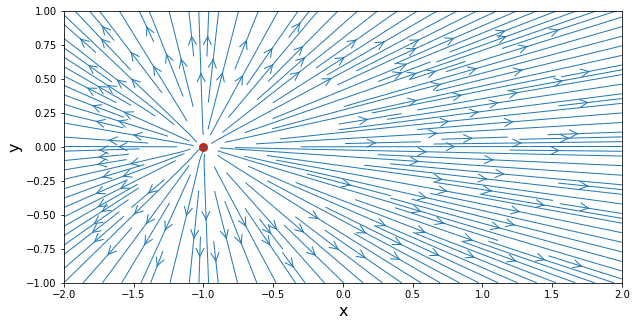

In [12]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_source, v_source, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o', linewidth=0);

Obratiti pozornost na `;` na zadnjoj liniji u gornjoj ćeliji, kojom se ne ispisuje `<matplotlib ...>` poruku, što označava interni ID slike. (`Out[3]` rezultat crtanja mesh-grid plota ima tu liniju).

Probati mijenjati parametre.

##### Pitanje

Koji je maseni protok iz nekog zatvorenog lika oko izvora?

## Sink flow

Intenzitet izvora $\sigma$ je pozitivan, dok je *ponor* izvor s *negativnim* intenzitetom. Strujnice su ravne linije koje ulaze u jednu točku.

Polje brzina ponora je ekvivalentno polju brzina izvora, samo s suprotnim smjerom strujanja. Python kod treba samo malo modificirati.

Postavit ćemo ponor na $(1,0)$ i dati jednaki intenzitet izvoru, samo suprotnog predzaka.

In [13]:
strength_sink = -5.0                     # strength of the sink
x_sink, y_sink = 1.0, 0.0                # location of the sink

# compute the velocity on the mesh grid
u_sink = strength_sink/(2*math.pi) * (X-x_sink)/((X-x_sink)**2 + (Y-y_sink)**2)
v_sink = strength_sink/(2*math.pi) * (Y-y_sink)/((X-x_sink)**2 + (Y-y_sink)**2)

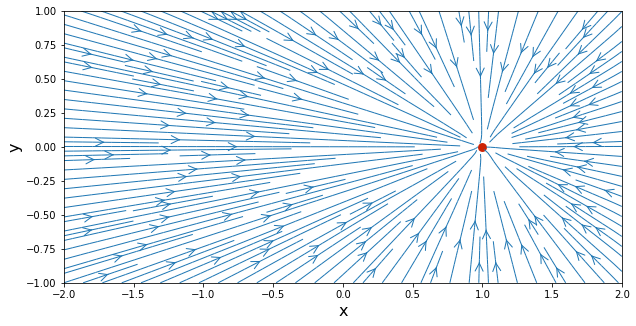

In [14]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_sink, v_sink, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink, color='#CD2305', s=80, marker='o', linewidth=0);

## Source-sink par

Superpozicija na djelu. Već smo izračunali polja brzina za izvor i ponor. Sada je potrebno zbrojiti polja brzina (point wise), čime ćemo dobiti novo rješenje potencijalnog toka: **source-sink pair**. 

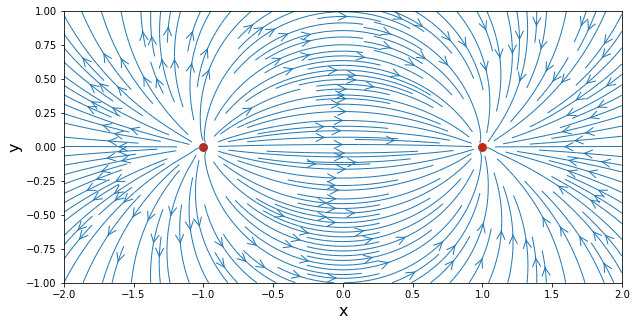

In [15]:
# compute the velocity of the pair source/sink by superposition
u_pair = u_source + u_sink
v_pair = v_source + v_sink

# plot the streamlines of the pair source/sink
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_pair, v_pair, density=2.0, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], 
            color='#CD2305', s=80, marker='o', linewidth=0);

Mijenjati parametre: položaj i intenzitet izvora i ponora.


##### Zadačić

Umjesto strujnica, napisati svoj kod za crtanje strujnica. Možda može pomoći [`contour()`](http://matplotlib.org/examples/pylab_examples/contour_demo.html) funkcija.

---

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()